In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [34]:
#5.1
stock_data = pd.read_csv('D:\intern\module 1\Small_Cap\PVR.csv')

In [35]:
stock_data.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,PVR,EQ,15-May-2017,1526.20,1532.35,1538.15,1515.45,1520.00,1524.95,1526.51,103693,1.582883e+08,7359,54518,52.58
1,PVR,EQ,16-May-2017,1524.95,1526.70,1545.00,1526.65,1533.25,1539.00,1538.04,86547,1.331129e+08,6332,39020,45.09
2,PVR,EQ,17-May-2017,1539.00,1539.70,1552.85,1526.05,1527.00,1530.30,1538.01,73902,1.136622e+08,4665,21303,28.83
3,PVR,EQ,18-May-2017,1530.30,1525.00,1539.35,1502.20,1514.90,1515.05,1519.68,82125,1.248035e+08,2903,38796,47.24
4,PVR,EQ,19-May-2017,1515.05,1515.00,1534.50,1502.20,1517.65,1513.55,1513.25,114890,1.738567e+08,9495,54764,47.67


In [36]:
stock_data = stock_data[stock_data['Series']=='EQ']
stock_data['daily returns'] = stock_data['Close Price'].pct_change()

In [37]:
dr_mean = stock_data['daily returns'].mean()
dr_std = stock_data['daily returns'].std()

In [38]:
annual_dr_mean = dr_mean * 252
annual_dr_std = dr_std * math.sqrt(252)

print(annual_dr_mean)
print(annual_dr_std)

0.11108967913350867
0.3101981064238005


In [39]:
#5.2
df1 = pd.read_csv('D:\intern\module 1\Small_Cap\FORTIS.csv')
df2 = pd.read_csv('D:\intern\module 1\Small_Cap\BAJAJELEC.csv')
df3 = pd.read_csv('D:\intern\module 1\Mid_Cap\IGL.csv')
df4 = pd.read_csv('D:\intern\module 1\Large_Cap\INFY.csv')
df5 = pd.read_csv('D:\intern\module 1\Large_Cap\HDFC.csv')

In [40]:
print(df1.shape,df2.shape,df3.shape,df4.shape,df4.shape)

(495, 15) (494, 15) (497, 15) (496, 15) (496, 15)


In [41]:
df1 = df1[df1['Series']=='EQ']
df2 = df2[df2['Series']=='EQ']
df3 = df3[df3['Series']=='EQ']
df4 = df4[df4['Series']=='EQ']
df5 = df5[df5['Series']=='EQ']

In [42]:
print(df1.shape,df2.shape,df3.shape,df4.shape,df4.shape)

(494, 15) (494, 15) (494, 15) (494, 15) (494, 15)


In [43]:
df1['daily returns'] = df1['Close Price'].pct_change()
df2['daily returns'] = df2['Close Price'].pct_change()
df3['daily returns'] = df3['Close Price'].pct_change()
df4['daily returns'] = df4['Close Price'].pct_change()
df5['daily returns'] = df5['Close Price'].pct_change()

In [44]:
df1_annual_mean = df1['daily returns'].mean() * 252
df2_annual_mean = df2['daily returns'].mean() * 252
df3_annual_mean = df3['daily returns'].mean() * 252
df4_annual_mean = df4['daily returns'].mean() * 252
df5_annual_mean = df5['daily returns'].mean() * 252

In [45]:
df1_annual_std = df1['daily returns'].std() * math.sqrt(252)
df2_annual_std = df2['daily returns'].std() * math.sqrt(252)
df3_annual_std = df3['daily returns'].std() * math.sqrt(252)
df4_annual_std = df4['daily returns'].std() * math.sqrt(252)
df5_annual_std = df5['daily returns'].std() * math.sqrt(252)

In [46]:
annual_mean_arr = np.array([df1_annual_mean, df2_annual_mean, df3_annual_mean, df4_annual_mean, df5_annual_mean])
annual_std_arr = np.array([df1_annual_std, df2_annual_std, df3_annual_std, df4_annual_std, df5_annual_std])

In [47]:
annual_portfolio_return = 20*np.sum(annual_mean_arr)
annual_portfolio_volatality = 20*np.sum(annual_std_arr)

In [48]:
print(annual_portfolio_return)
print(annual_portfolio_volatality)

2.517756436424028
42.116394821719055


In [59]:
#5.3
returns = []
volatile = []
sharp = []
max_srpr = -pow(10,6)
low_vol = pow(10, 6)
for i in range(2500):
    temp = np.random.dirichlet(np.ones(5),size=1)
    returns.append(np.sum(temp*annual_mean_arr))
    volatile.append(np.sum(temp*annual_std_arr))
    sharp.append(returns[i]/volatile[i])
    if(sharp[i]>max_srpr):
        max_srpr = sharp[i]
        ret1 = returns[i]
        vol1 = volatile[i]
    if(volatile[i]<low_vol):
        low_vol = volatile[i]
        ret2 = returns[i]
        vol2 = volatile[i]

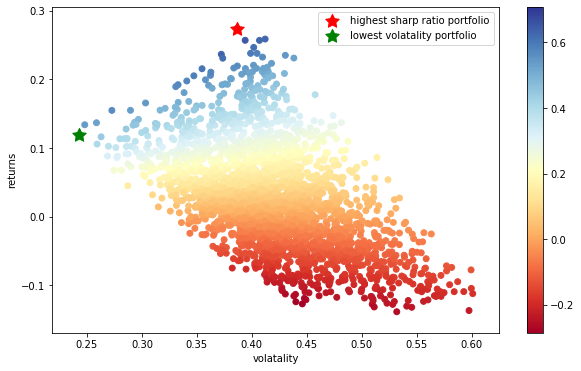

In [60]:
plt.figure(figsize=(10,6))
cm = plt.cm.get_cmap('RdYlBu')
sm = plt.scatter(volatile,returns, c=sharp, s=35, cmap=cm)
plt.scatter(vol1,ret1,color='red',marker=(5, 1),s = 200,label = 'highest sharp ratio portfolio')
plt.scatter(vol2, ret2, color = 'green',marker=(5, 1), s= 200, label = 'lowest volatality portfolio')
plt.colorbar(sm)
plt.legend()
plt.xlabel('volatality')
plt.ylabel('returns')
plt.show()